In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
merged_df = pd.read_csv('merged_df.csv', encoding='iso-8859-1')

merged_df.sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,population_unit,value,flag,flag_description,note,years_existing,average_production,value_per_capita,iso_alpha3,continent
9577,IRL,104,Ireland,2573,Sunflowerseed Oil,5142,Food,1000 tonnes,53.41,-8.24,...,1000,4761.657,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,7.264151,4.761657,IRL,Europe
20352,URY,234,Uruguay,2655,Wine,5142,Food,1000 tonnes,-32.52,-55.77,...,1000,3456.750,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,83.000000,3.456750,URY,South America
11225,LBN,121,Lebanon,2563,Olives (including preserved),5142,Food,1000 tonnes,33.85,35.86,...,1000,6082.357,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,12.037736,6.082357,LBN,Asia


In [190]:
#copied from compasison_plot

top_5_areas = merged_df.groupby('area')['average_production'].mean().nlargest(5)
filtered_food = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Food')
filtered_feed = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Feed')
merged_df[filtered_food].groupby(['area', 'item'])['average_production'].mean().reset_index()
top_5_food = merged_df[filtered_food].groupby(['area', 'item', 'element'])['average_production'].mean()
top_5_food = top_5_food.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_food

,area,item,element,average_production
0,Brazil,Cereals - Excluding Beer,Food,15129.226415
1,Brazil,Milk - Excluding Butter,Food,14177.245283
2,Brazil,Fruits - Excluding Wine,Food,13762.622642
3,Brazil,Starchy Roots,Food,10348.716981
4,Brazil,Meat,Food,8237.867925
5,"China, mainland",Vegetables,Food,170690.452830
6,"China, mainland",Cereals - Excluding Beer,Food,163752.188679
7,"China, mainland","Vegetables, Other",Food,150235.811321
8,"China, mainland",Starchy Roots,Food,87244.867925
9,"China, mainland",Rice (Milled Equivalent),Food,80586.169811


In [191]:
##PREPARATION FOR LINE PLOT

# function to Loop through the columns in the filtered_df that start with 'y'
def extract_year_values(df):
    area_code = df['area_code'].values[0]
    item_code = df['item_code'].values[0]
    continent = df['continent'].values[0]
    item = df['item'].values[0]
    year_values = []
    for col in df.columns:
        if col.startswith('y') and col not in ['year_code', 'year', 'years_existing']:
            year = int(col[1:])  # extract the year from the column name
            value = df[col].values[0]  # get the value for this year
            year_values.append({
                'Area': area_code,
                'Item Code': item_code,
                'Item': item,
                'Year': year,
                'Year Value': value,
                'Continent' : continent
            })
    return pd.DataFrame(year_values)



def plot_top_items(df, area, items, element, str):
    plt.figure(figsize=(10, 6))
    
    # Loop through each item and filter, extract, and plot the data
    for item in items:
        # Filter the DataFrame for the specified area, item, and element
        filtered_df = df[(df[str] == area) & (df['item'] == item) & (df['element'] == element)]
        
        # Extract year values
        year_df = extract_year_values(filtered_df)
        
        # Plot the data
        sns.lineplot(x='Year', y='Year Value', data=year_df, label=item)
    
    # Customize the plot
    plt.title(f'Line Plot for Top 5 {element} Items in {area}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title=f'{element} Items')
    plt.show()


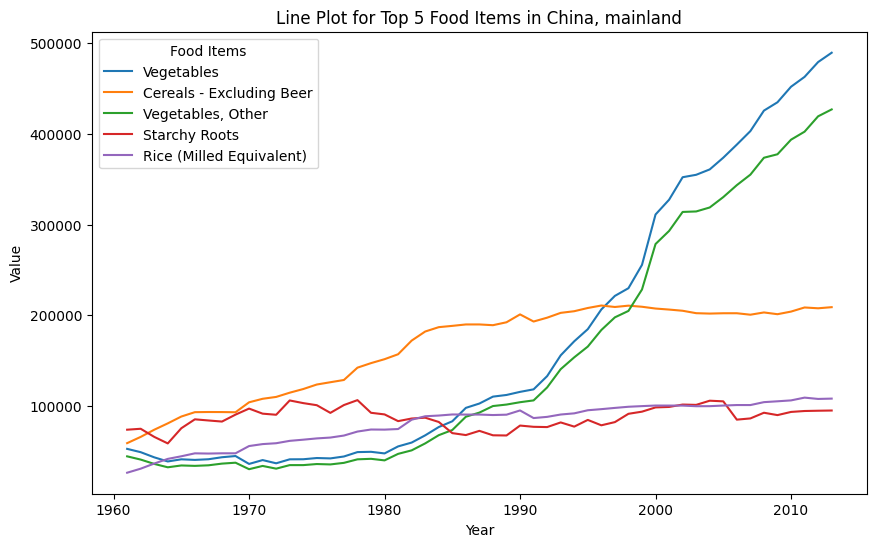

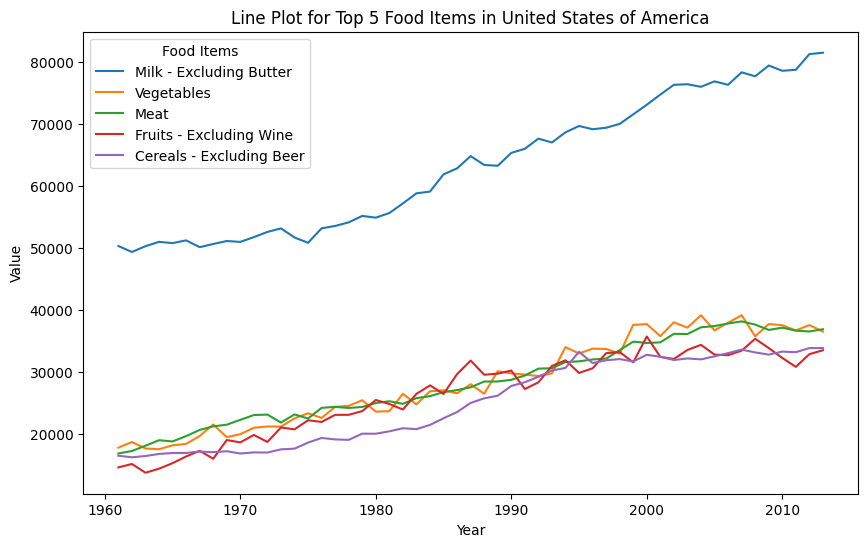

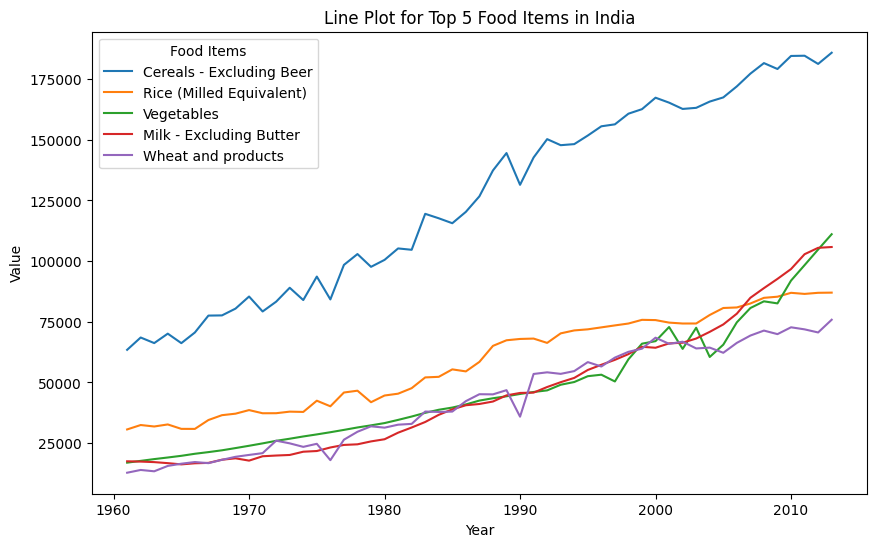

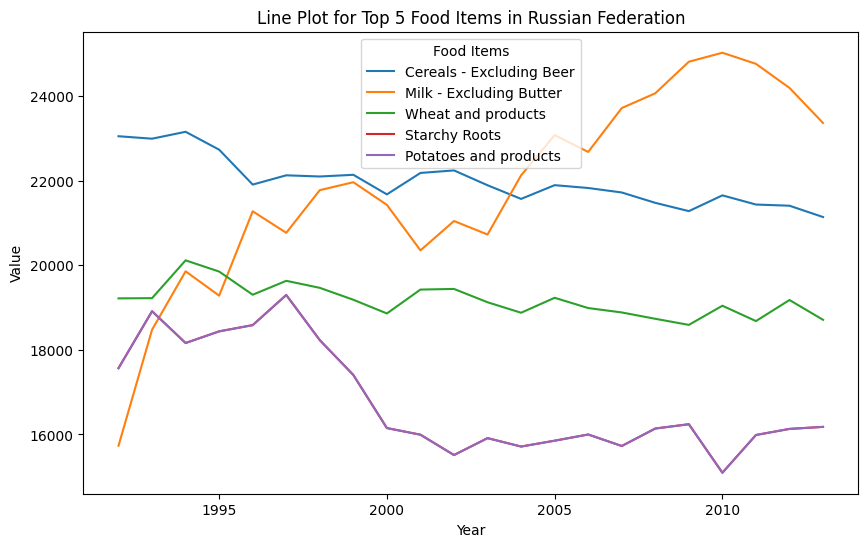

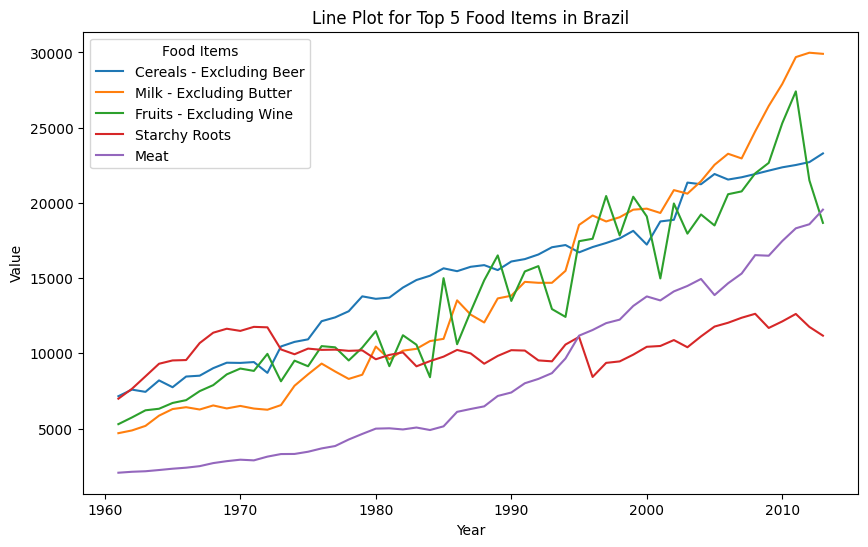

In [192]:
areas = top_5_areas.index.tolist()

for area in areas:
    # Filter the top 5 food items for the specific area and element 'Food'
    food_items = top_5_food[(top_5_food['area'] == area) & (top_5_food['element'] == 'Food')]['item'].values
    
    # Call the function to create the plot
    plot_top_items(merged_df, area, food_items, 'Food', 'area')

In [193]:
top_5_feed = merged_df[filtered_feed].groupby(['area', 'item', 'element'])['average_production'].mean()
top_5_feed = top_5_feed.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()
top_5_feed

,area,item,element,average_production
0,Brazil,Cereals - Excluding Beer,Feed,20385.754717
1,Brazil,Maize and products,Feed,19606.358491
2,Brazil,Starchy Roots,Feed,12620.018868
3,Brazil,Cassava and products,Feed,12162.924528
4,Brazil,Sugar Crops,Feed,7022.037736
5,"China, mainland",Cereals - Excluding Beer,Feed,77070.056604
6,"China, mainland",Maize and products,Feed,60690.716981
7,"China, mainland",Starchy Roots,Feed,47778.754717
8,"China, mainland",Sweet potatoes,Feed,34963.377358
9,"China, mainland",Rice (Milled Equivalent),Feed,9273.679245


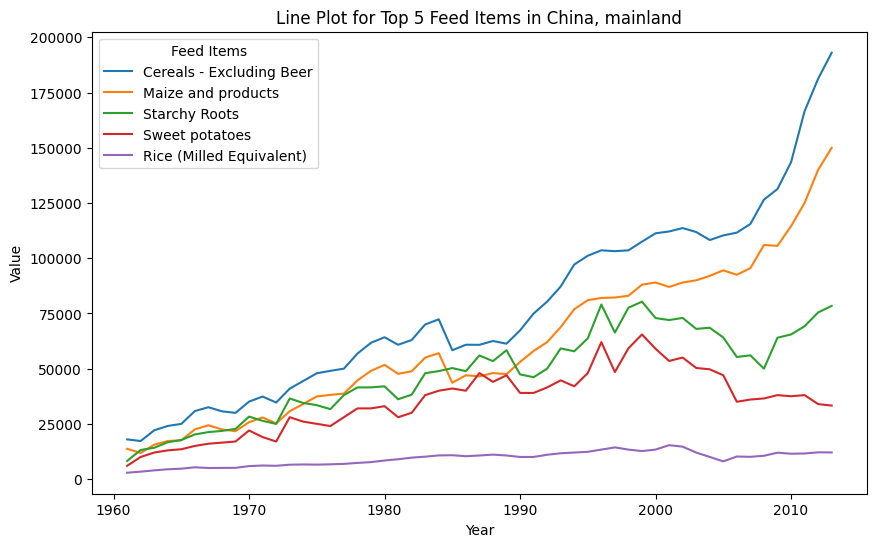

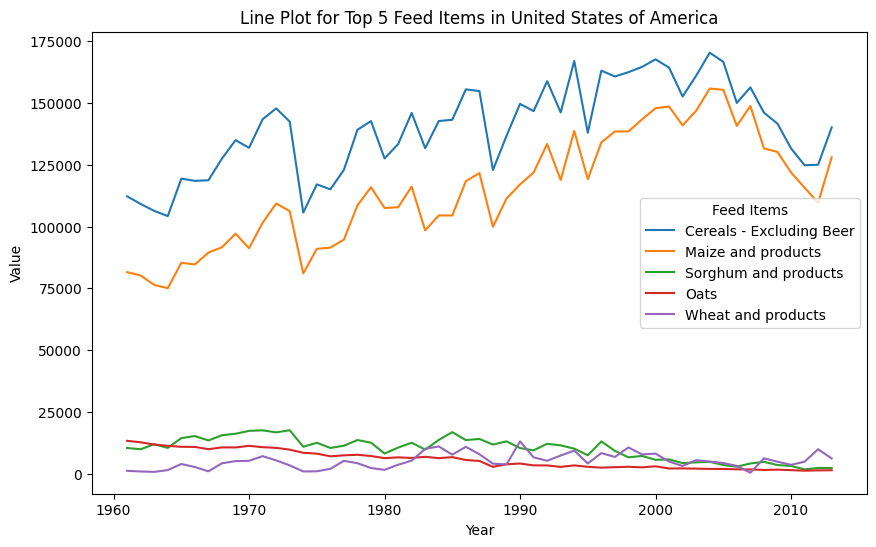

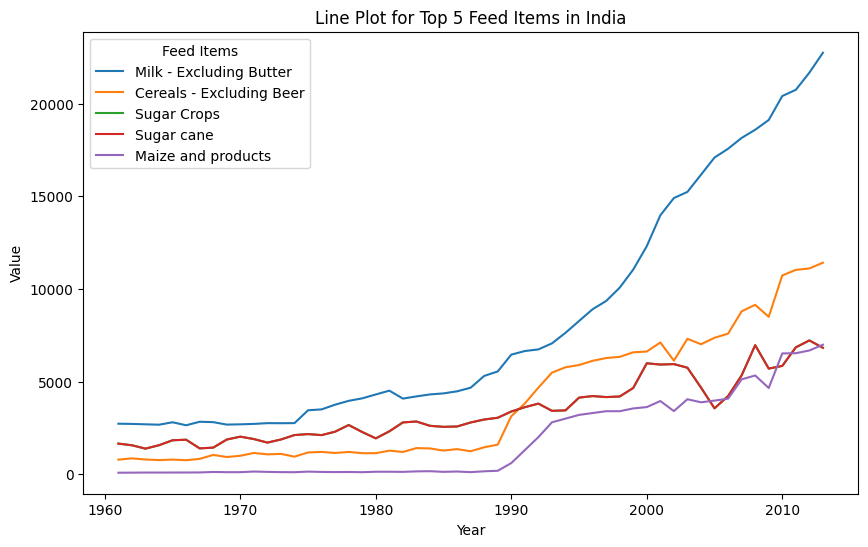

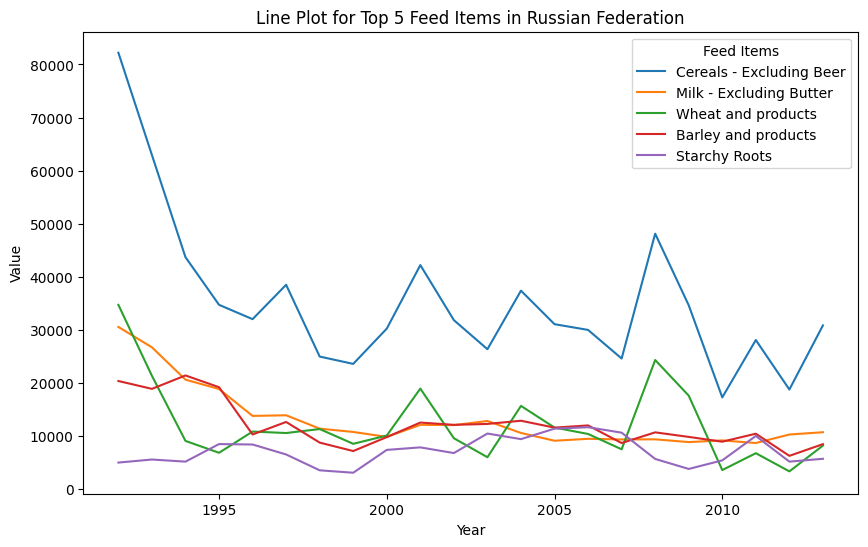

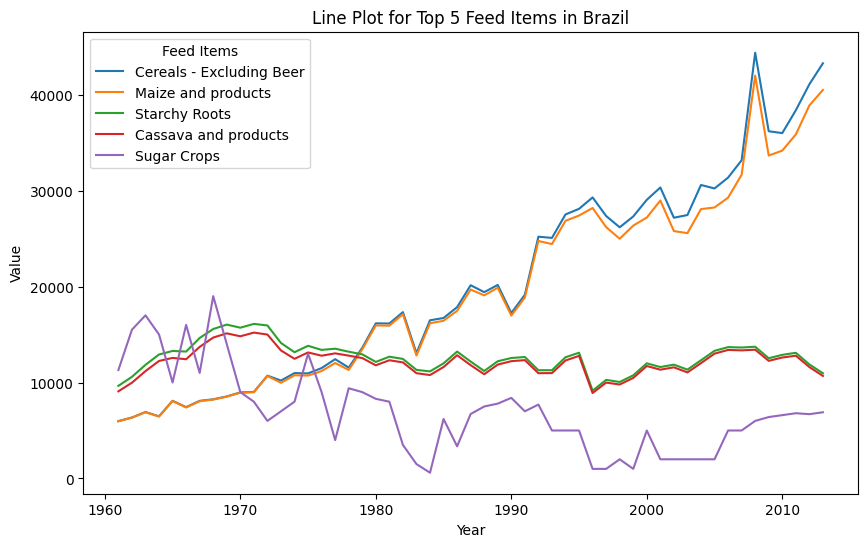

In [194]:
areas = top_5_areas.index.tolist()

for area in areas:
    feed_items = top_5_feed[(top_5_feed['area'] == area) & (top_5_feed['element'] == 'Feed')]['item'].values
    
    # Call the function to create the plot
    plot_top_items(merged_df, area, feed_items, 'Feed', 'area')

In [195]:
average_production_by_continent = merged_df.groupby('continent')['average_production'].mean()
top_3_continents = average_production_by_continent.nlargest(3)


feed_by_continent = (merged_df['continent'].isin(top_3_continents.index)) & (merged_df['element'] == 'Feed')
top_5_feed_per_continent = merged_df[feed_by_continent].groupby(['continent', 'item', 'element'])['average_production'].mean()
top_5_feed_per_continent = top_5_feed_per_continent.groupby('continent').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_feed_per_continent

,continent,item,element,average_production
0,Asia,Cereals - Excluding Beer,Feed,3329.961065
1,Asia,Sweet potatoes,Feed,2622.101078
2,Asia,Maize and products,Feed,2299.833410
3,Asia,Starchy Roots,Feed,1597.706376
4,Asia,Sugar cane,Feed,1200.973046
5,Europe,Cereals - Excluding Beer,Feed,5562.473826
6,Europe,Barley and products,Feed,1605.327126
7,Europe,Maize and products,Feed,1513.865712
8,Europe,Wheat and products,Feed,1500.091547
9,Europe,Starchy Roots,Feed,1486.940799


In [196]:
def extract_year_values_by_continent(df):
    """
    This function aggregates the values by year and continent.
    
    Parameters:
    df (DataFrame): DataFrame containing data with year columns prefixed by 'y'.
    
    Returns:
    DataFrame: A DataFrame containing aggregated values by year and continent.
    """
    # Initialize an empty list to store the aggregated data
    continent_year_values = []

    # Get the unique continents from the DataFrame
    continents = df['continent'].unique()

    # Loop through each continent
    for continent in continents:
        # Filter the DataFrame for the current continent
        continent_df = df[df['continent'] == continent]
        
        # Extract the year values using the existing function
        year_df = extract_year_values(continent_df)
        
        # Group by Year and Continent and sum up the values
        aggregated_df = year_df.groupby(['Continent', 'Year', 'Item']).agg({'Year Value': 'sum'}).reset_index()
        
        # Append the aggregated data to the list
        continent_year_values.append(aggregated_df)

    # Concatenate all continent data into a single DataFrame
    return pd.concat(continent_year_values, ignore_index=True)

# Example usage of the function
continent_totals = extract_year_values_by_continent(merged_df)
print(continent_totals)

    Continent  Year                Item  Year Value
0        Asia  1961  Wheat and products      1928.0
1        Asia  1962  Wheat and products      1904.0
2        Asia  1963  Wheat and products      1666.0
3        Asia  1964  Wheat and products      1950.0
4        Asia  1965  Wheat and products      2001.0
..        ...   ...                 ...         ...
313   Oceania  2009  Wheat and products      1940.0
314   Oceania  2010  Wheat and products      3764.0
315   Oceania  2011  Wheat and products      2455.0
316   Oceania  2012  Wheat and products      3134.0
317   Oceania  2013  Wheat and products      3200.0

[318 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_8724\2142613736.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  food_items = top_5_feed_per_continent[(top_5_feed_per_continent['continent'] == area) & (top_5_food['element'] == 'Feed')]['item'].values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


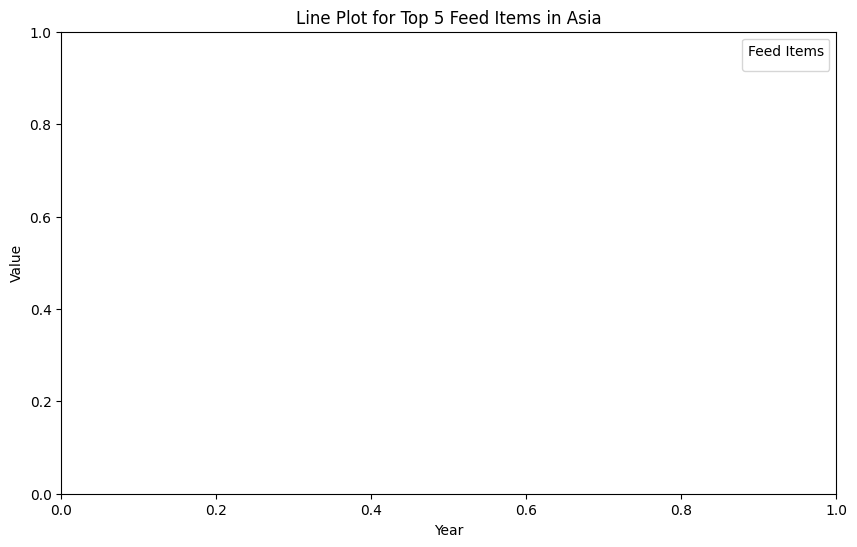

C:\Users\User\AppData\Local\Temp\ipykernel_8724\2142613736.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  food_items = top_5_feed_per_continent[(top_5_feed_per_continent['continent'] == area) & (top_5_food['element'] == 'Feed')]['item'].values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


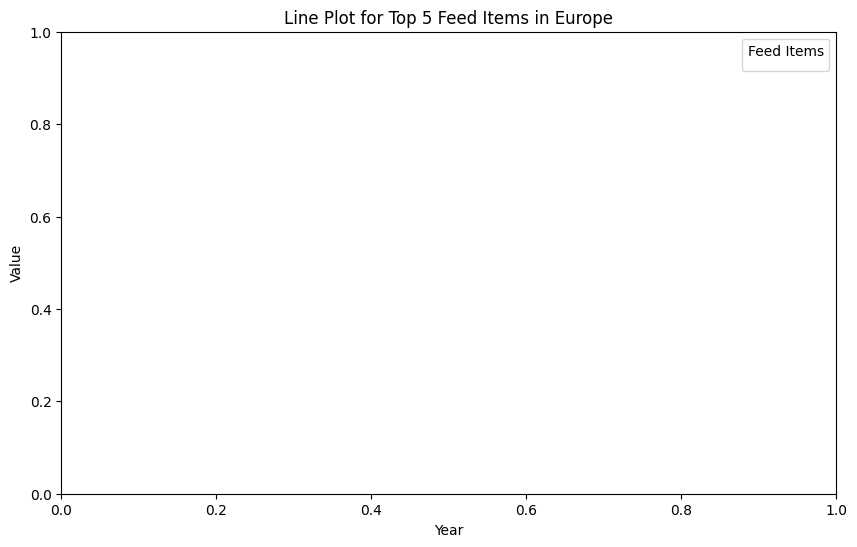

C:\Users\User\AppData\Local\Temp\ipykernel_8724\2142613736.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  food_items = top_5_feed_per_continent[(top_5_feed_per_continent['continent'] == area) & (top_5_food['element'] == 'Feed')]['item'].values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


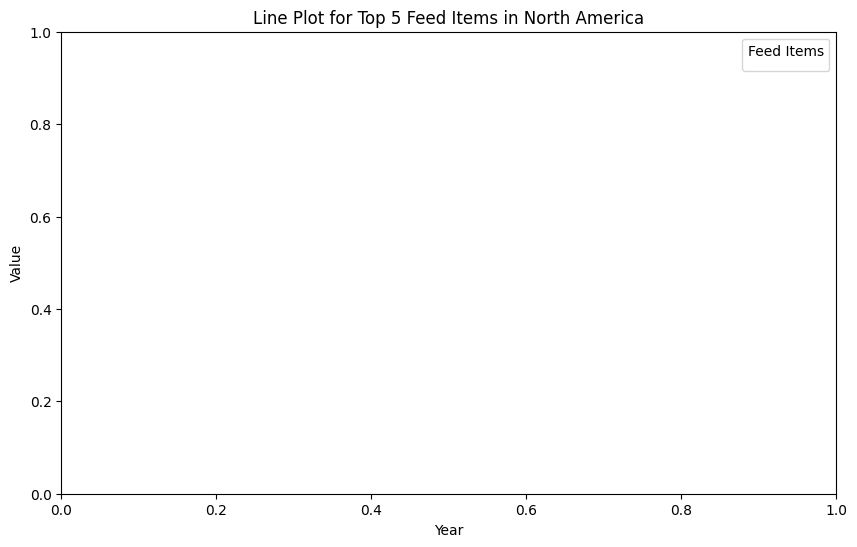

In [197]:
areas = top_3_continents.index.tolist()

for area in areas:
    # Filter the top 5 food items for the specific area and element 'Food'
    food_items = top_5_feed_per_continent[(top_5_feed_per_continent['continent'] == area) & (top_5_food['element'] == 'Feed')]['item'].values
    
    # Call the function to create the plot
    plot_top_items(continent_totals, area, food_items, 'Feed', 'continent')